# NVAE Experiment on CIFAR-10

This notebook implements the training and evaluation pipeline for the Nouveau VAE (NVAE) model on CIFAR-10.

## 1. Google Colab Setup
Mount Drive and clone the repository (Fresh Copy).

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import os
import sys
import shutil

# --- CONFIGURATION ---
REPO_PATH = '/content/drive/MyDrive/Generative-Modeling-on-CIFAR-10'
REPO_URL = "https://github.com/konstantine25b/Generative-Modeling-on-CIFAR-10.git"

# 1. Delete repo if it already exists (Ensure fresh code)
if os.path.exists(REPO_PATH):
    print(f"Deleting existing repository at {REPO_PATH}...")
    shutil.rmtree(REPO_PATH)

# 2. Clone repository
os.chdir('/content/drive/MyDrive')
print(f"Cloning repository to {REPO_PATH}...")
!git clone {REPO_URL}

# 3. Enter the repository
os.chdir(REPO_PATH)
print(f"Current working directory: {os.getcwd()}")

# 4. Add source code to Python path
sys.path.append(os.path.join(REPO_PATH, 'src'))

Mounted at /content/drive
Deleting existing repository at /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10...
Cloning repository to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10...
Cloning into 'Generative-Modeling-on-CIFAR-10'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (163/163), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 196 (delta 101), reused 105 (delta 48), pack-reused 33 (from 1)
Receiving objects: 100% (196/196), 216.86 MiB | 17.34 MiB/s, done.
Resolving deltas: 100% (108/108), done.
Updating files: 100% (38/38), done.
Current working directory: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10


## 2. GitHub Configuration (Optional)
Configure this if you want to push results back to the repo.

In [2]:
# GitHub Configuration & Setup
import os

try:
    # 1. Configure Git
    user_name = "konstantine25b"
    mail = "konstantine25b@gmail.com"

    # --- IMPORTANT: PASTE YOUR TOKEN BELOW ---
    my_token = "YOUR_TOKEN_HERE"

    if my_token == "YOUR_TOKEN_HERE":
        print("⚠️ PLEASE UPDATE 'my_token' in the code cell with your actual GitHub token to enable pushing.")

    repo_url = f"https://{my_token}@github.com/konstantine25b/Generative-Modeling-on-CIFAR-10.git"

    !git config --global user.name "{user_name}"
    !git config --global user.email "{mail}"

    # 2. Set Remote URL
    if os.path.isdir(".git") and my_token != "YOUR_TOKEN_HERE":
        !git remote set-url origin "{repo_url}"
        print("Git configured successfully for pushing.")
    else:
        print("Skipping remote setup (either not a git repo or token not set).")

except Exception as e:
    print(f"Error setting up GitHub: {e}")

⚠️ PLEASE UPDATE 'my_token' in the code cell with your actual GitHub token to enable pushing.
Skipping remote setup (either not a git repo or token not set).


## 3. Install Dependencies

In [3]:
!pip install -r requirements.txt
!pip install wandb -q

import wandb
wandb.login()

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Find your API key here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: konstantine25b (konstantine25b-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## 4. Setup Experiment

In [11]:
import torch
from src.utils.data_loader import get_cifar10_loaders
from src.vae.train import train_vae
from src.vae.sampling import generate_samples, save_sample_grid
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import wandb

# Configuration
config = {
    'epochs': 200,
    'batch_size': 64,
    'lr': 1e-3,
    'hidden_dim': 64,
    'latent_dim': 20,
    'num_scales': 2,
    'warmup_epochs': 165,
    'weight_decay': 3e-4,
    'use_wandb': True, # Set to True if using WandB
    # Save checkpoints OUTSIDE the repo folder to avoid deletion during re-runs
    'model_save_dir': '/content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1',
    'results_dir': 'results/'
}

# Create directories
os.makedirs(config['model_save_dir'], exist_ok=True)
os.makedirs(config['results_dir'], exist_ok=True)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")
print(f"Checkpoints will be saved to: {config['model_save_dir']}")

Using device: cuda
Checkpoints will be saved to: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1


## 5. Load Data

In [12]:
train_loader, val_loader, test_loader = get_cifar10_loaders(
    data_dir='./data',
    batch_size=config['batch_size']
)

Data Loaders ready: Train=45000, Val=5000, Test=10000


## 6. Train Model

In [13]:
# Start Training
train_vae(config, train_loader, val_loader, device)

epoch,▁▁▂▂▂▂▃▃▃▄▄▄▅▅▅▅▆▆▆▇▇▇▇██
test/final_bpd,▁
test/final_loss,▁
test/iwelbo_bpd,▁
test/iwelbo_loss,▁
train/beta,▁▁▂▃▃▃▃▄▄▅▆▇▇▇██████████████████████████
train/bpd,▁▁▂▃▄▄▅▆▆▇▇█▇▆▆▆▆▆▅▅▅▆▆▅▅
train/kl,▇██▇▆▅▄▃▂▁▁▁▁▁▁▂▂▂▂▂▃▃▂▃▃
train/loss,▁▁▂▃▄▄▅▆▆▇▇█▇▆▆▆▆▆▅▅▅▆▆▅▅
train/lr,███▇▇▇▇▇▆▆▆▆▆▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▂▁▁▁▁▁
+7,...


Model initialized on cuda
Resuming from checkpoint: /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_150.pth
Updating scheduler T_max from 150 to 200
Resumed training from epoch 150


Epoch 151/200: 100%|██████████| 704/704 [01:32<00:00,  7.63it/s, loss=16250.39, bpd=7.63, beta=0.92]


=== Epoch 151 Summary ===
Train Loss: 9437.2941 | Recon: 8228.3301 | KL: 1321.0533 | BPD: 4.4320


Val Loss:   9504.3115 | Val BPD: 4.4635
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_151.pth


Epoch 152/200: 100%|██████████| 704/704 [01:32<00:00,  7.63it/s, loss=12255.20, bpd=5.76, beta=0.92]


=== Epoch 152 Summary ===
Train Loss: 9438.2940 | Recon: 8212.7827 | KL: 1330.3247 | BPD: 4.4325


Val Loss:   9483.1959 | Val BPD: 4.4536
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_152.pth


Epoch 153/200: 100%|██████████| 704/704 [01:32<00:00,  7.60it/s, loss=17064.41, bpd=8.01, beta=0.93]


=== Epoch 153 Summary ===
Train Loss: 9443.4855 | Recon: 8209.5243 | KL: 1330.7424 | BPD: 4.4349


Val Loss:   9475.5298 | Val BPD: 4.4500
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_153.pth


Epoch 154/200: 100%|██████████| 704/704 [01:32<00:00,  7.60it/s, loss=10142.02, bpd=4.76, beta=0.93]


=== Epoch 154 Summary ===
Train Loss: 9443.1877 | Recon: 8202.5616 | KL: 1329.2422 | BPD: 4.4348


Val Loss:   9453.0111 | Val BPD: 4.4394
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9453.0111)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_154.pth


Epoch 155/200: 100%|██████████| 704/704 [01:32<00:00,  7.58it/s, loss=12179.44, bpd=5.72, beta=0.94]


=== Epoch 155 Summary ===
Train Loss: 9455.1079 | Recon: 8208.1510 | KL: 1327.4057 | BPD: 4.4404


Val Loss:   9459.2162 | Val BPD: 4.4423
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_155.pth


Epoch 156/200: 100%|██████████| 704/704 [01:32<00:00,  7.64it/s, loss=14533.96, bpd=6.83, beta=0.95]


=== Epoch 156 Summary ===
Train Loss: 9466.5022 | Recon: 8213.8913 | KL: 1324.8768 | BPD: 4.4457


Val Loss:   9471.7344 | Val BPD: 4.4482
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_156.pth


Epoch 157/200: 100%|██████████| 704/704 [01:32<00:00,  7.65it/s, loss=10549.72, bpd=4.95, beta=0.95]


=== Epoch 157 Summary ===
Train Loss: 9465.0071 | Recon: 8206.9276 | KL: 1322.1855 | BPD: 4.4450


Val Loss:   9448.2648 | Val BPD: 4.4372
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9448.2648)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_157.pth


Epoch 158/200: 100%|██████████| 704/704 [01:31<00:00,  7.66it/s, loss=11469.44, bpd=5.39, beta=0.96]


=== Epoch 158 Summary ===
Train Loss: 9481.0630 | Recon: 8217.5828 | KL: 1319.4571 | BPD: 4.4526


Val Loss:   9452.0759 | Val BPD: 4.4390
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_158.pth


Epoch 159/200: 100%|██████████| 704/704 [01:31<00:00,  7.66it/s, loss=12716.41, bpd=5.97, beta=0.96]


=== Epoch 159 Summary ===
Train Loss: 9483.2526 | Recon: 8214.8862 | KL: 1316.2293 | BPD: 4.4536


Val Loss:   9466.0905 | Val BPD: 4.4455
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_159.pth


Epoch 160/200: 100%|██████████| 704/704 [01:31<00:00,  7.66it/s, loss=12388.48, bpd=5.82, beta=0.97]


=== Epoch 160 Summary ===
Train Loss: 9497.6638 | Recon: 8224.2667 | KL: 1313.1908 | BPD: 4.4604


Val Loss:   9468.1714 | Val BPD: 4.4465
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_160.pth


Epoch 161/200: 100%|██████████| 704/704 [01:31<00:00,  7.66it/s, loss=12120.34, bpd=5.69, beta=0.98]


=== Epoch 161 Summary ===
Train Loss: 9499.4220 | Recon: 8221.2875 | KL: 1309.8893 | BPD: 4.4612


Val Loss:   9453.2621 | Val BPD: 4.4395
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_161.pth


Epoch 162/200: 100%|██████████| 704/704 [01:31<00:00,  7.67it/s, loss=11118.41, bpd=5.22, beta=0.98]


=== Epoch 162 Summary ===
Train Loss: 9500.8733 | Recon: 8217.6338 | KL: 1307.0033 | BPD: 4.4619


Val Loss:   9491.3907 | Val BPD: 4.4574
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_162.pth


Epoch 163/200: 100%|██████████| 704/704 [01:32<00:00,  7.65it/s, loss=13767.86, bpd=6.47, beta=0.99]


=== Epoch 163 Summary ===
Train Loss: 9517.3905 | Recon: 8228.5401 | KL: 1304.6645 | BPD: 4.4696


Val Loss:   9486.3933 | Val BPD: 4.4551
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_163.pth


Epoch 164/200: 100%|██████████| 704/704 [01:32<00:00,  7.60it/s, loss=11791.02, bpd=5.54, beta=0.99]


=== Epoch 164 Summary ===
Train Loss: 9517.8571 | Recon: 8224.6462 | KL: 1301.0963 | BPD: 4.4698


Val Loss:   9462.3665 | Val BPD: 4.4438
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_164.pth


Epoch 165/200: 100%|██████████| 704/704 [01:32<00:00,  7.61it/s, loss=13012.62, bpd=6.11, beta=1.00]


=== Epoch 165 Summary ===
Train Loss: 9524.4693 | Recon: 8225.4923 | KL: 1298.9770 | BPD: 4.4730


Val Loss:   9479.9033 | Val BPD: 4.4520
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_165.pth


Epoch 166/200: 100%|██████████| 704/704 [01:32<00:00,  7.61it/s, loss=10648.27, bpd=5.00, beta=1.00]


=== Epoch 166 Summary ===
Train Loss: 9530.3646 | Recon: 8233.9272 | KL: 1296.4373 | BPD: 4.4757


Val Loss:   9451.5912 | Val BPD: 4.4387
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_166.pth


Epoch 167/200: 100%|██████████| 704/704 [01:32<00:00,  7.61it/s, loss=12058.55, bpd=5.66, beta=1.00]


=== Epoch 167 Summary ===
Train Loss: 9523.4266 | Recon: 8227.0513 | KL: 1296.3752 | BPD: 4.4725


Val Loss:   9465.5421 | Val BPD: 4.4453
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_167.pth


Epoch 168/200: 100%|██████████| 704/704 [01:32<00:00,  7.63it/s, loss=13840.71, bpd=6.50, beta=1.00]


=== Epoch 168 Summary ===
Train Loss: 9532.2186 | Recon: 8235.5670 | KL: 1296.6517 | BPD: 4.4766


Val Loss:   9472.3489 | Val BPD: 4.4485
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_168.pth


Epoch 169/200: 100%|██████████| 704/704 [01:31<00:00,  7.66it/s, loss=10829.51, bpd=5.09, beta=1.00]


=== Epoch 169 Summary ===
Train Loss: 9524.0615 | Recon: 8227.5562 | KL: 1296.5053 | BPD: 4.4728


Val Loss:   9448.4227 | Val BPD: 4.4372
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_169.pth


Epoch 170/200: 100%|██████████| 704/704 [01:31<00:00,  7.66it/s, loss=15779.88, bpd=7.41, beta=1.00]


=== Epoch 170 Summary ===
Train Loss: 9527.1299 | Recon: 8230.2527 | KL: 1296.8772 | BPD: 4.4742


Val Loss:   9497.4003 | Val BPD: 4.4602
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_170.pth


Epoch 171/200: 100%|██████████| 704/704 [01:32<00:00,  7.59it/s, loss=16726.15, bpd=7.86, beta=1.00]


=== Epoch 171 Summary ===
Train Loss: 9524.7845 | Recon: 8227.6285 | KL: 1297.1560 | BPD: 4.4731


Val Loss:   9525.0170 | Val BPD: 4.4732
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_171.pth


Epoch 172/200: 100%|██████████| 704/704 [01:32<00:00,  7.60it/s, loss=12817.71, bpd=6.02, beta=1.00]


=== Epoch 172 Summary ===
Train Loss: 9527.7281 | Recon: 8230.0701 | KL: 1297.6580 | BPD: 4.4745


Val Loss:   9455.6938 | Val BPD: 4.4407
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_172.pth


Epoch 173/200: 100%|██████████| 704/704 [01:33<00:00,  7.55it/s, loss=12689.01, bpd=5.96, beta=1.00]


=== Epoch 173 Summary ===
Train Loss: 9515.4240 | Recon: 8217.1140 | KL: 1298.3099 | BPD: 4.4687


Val Loss:   9459.4356 | Val BPD: 4.4424
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_173.pth


Epoch 174/200: 100%|██████████| 704/704 [01:33<00:00,  7.56it/s, loss=11254.03, bpd=5.29, beta=1.00]


=== Epoch 174 Summary ===
Train Loss: 9522.5413 | Recon: 8225.2363 | KL: 1297.3050 | BPD: 4.4720


Val Loss:   9486.1784 | Val BPD: 4.4550
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_174.pth


Epoch 175/200: 100%|██████████| 704/704 [01:32<00:00,  7.58it/s, loss=15665.24, bpd=7.36, beta=1.00]


=== Epoch 175 Summary ===
Train Loss: 9524.3760 | Recon: 8226.2445 | KL: 1298.1314 | BPD: 4.4729


Val Loss:   9462.1724 | Val BPD: 4.4437
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_175.pth


Epoch 176/200: 100%|██████████| 704/704 [01:33<00:00,  7.56it/s, loss=10860.97, bpd=5.10, beta=1.00]


=== Epoch 176 Summary ===
Train Loss: 9518.1699 | Recon: 8220.0473 | KL: 1298.1227 | BPD: 4.4700


Val Loss:   9489.6272 | Val BPD: 4.4566
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_176.pth


Epoch 177/200: 100%|██████████| 704/704 [01:33<00:00,  7.53it/s, loss=10458.88, bpd=4.91, beta=1.00]


=== Epoch 177 Summary ===
Train Loss: 9521.9854 | Recon: 8223.3634 | KL: 1298.6220 | BPD: 4.4718


Val Loss:   9457.1145 | Val BPD: 4.4413
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_177.pth


Epoch 178/200: 100%|██████████| 704/704 [01:33<00:00,  7.53it/s, loss=15055.92, bpd=7.07, beta=1.00]


=== Epoch 178 Summary ===
Train Loss: 9516.1433 | Recon: 8217.5996 | KL: 1298.5437 | BPD: 4.4690


Val Loss:   9474.4374 | Val BPD: 4.4495
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_178.pth


Epoch 179/200: 100%|██████████| 704/704 [01:33<00:00,  7.54it/s, loss=9744.65, bpd=4.58, beta=1.00]


=== Epoch 179 Summary ===
Train Loss: 9510.3603 | Recon: 8210.4799 | KL: 1299.8804 | BPD: 4.4663


Val Loss:   9471.8240 | Val BPD: 4.4482
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_179.pth


Epoch 180/200: 100%|██████████| 704/704 [01:33<00:00,  7.51it/s, loss=16852.14, bpd=7.91, beta=1.00]


=== Epoch 180 Summary ===
Train Loss: 9529.2337 | Recon: 8230.7464 | KL: 1298.4873 | BPD: 4.4752


Val Loss:   9488.5499 | Val BPD: 4.4561
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_180.pth


Epoch 181/200: 100%|██████████| 704/704 [01:33<00:00,  7.55it/s, loss=13957.29, bpd=6.55, beta=1.00]


=== Epoch 181 Summary ===
Train Loss: 9518.7555 | Recon: 8219.4005 | KL: 1299.3550 | BPD: 4.4703


Val Loss:   9568.7370 | Val BPD: 4.4937
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_181.pth


Epoch 182/200: 100%|██████████| 704/704 [01:32<00:00,  7.57it/s, loss=12505.75, bpd=5.87, beta=1.00]


=== Epoch 182 Summary ===
Train Loss: 9513.6569 | Recon: 8214.7319 | KL: 1298.9250 | BPD: 4.4679


Val Loss:   9449.6225 | Val BPD: 4.4378
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_182.pth


Epoch 183/200: 100%|██████████| 704/704 [01:32<00:00,  7.58it/s, loss=16553.60, bpd=7.77, beta=1.00]


=== Epoch 183 Summary ===
Train Loss: 9529.7935 | Recon: 8230.9958 | KL: 1298.7977 | BPD: 4.4755


Val Loss:   9464.1688 | Val BPD: 4.4446
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_183.pth


Epoch 184/200: 100%|██████████| 704/704 [01:33<00:00,  7.56it/s, loss=9579.73, bpd=4.50, beta=1.00]


=== Epoch 184 Summary ===
Train Loss: 9513.0763 | Recon: 8213.9752 | KL: 1299.1012 | BPD: 4.4676


Val Loss:   9450.9215 | Val BPD: 4.4384
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_184.pth


Epoch 185/200: 100%|██████████| 704/704 [01:33<00:00,  7.57it/s, loss=11887.46, bpd=5.58, beta=1.00]


=== Epoch 185 Summary ===
Train Loss: 9513.8354 | Recon: 8214.1162 | KL: 1299.7192 | BPD: 4.4680


Val Loss:   9440.6929 | Val BPD: 4.4336
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9440.6929)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_185.pth


Epoch 186/200: 100%|██████████| 704/704 [01:33<00:00,  7.53it/s, loss=18641.33, bpd=8.75, beta=1.00]


=== Epoch 186 Summary ===
Train Loss: 9517.6207 | Recon: 8216.3853 | KL: 1301.2354 | BPD: 4.4697


Val Loss:   9514.6286 | Val BPD: 4.4683
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_186.pth


Epoch 187/200: 100%|██████████| 704/704 [01:33<00:00,  7.50it/s, loss=11304.92, bpd=5.31, beta=1.00]


=== Epoch 187 Summary ===
Train Loss: 9516.1260 | Recon: 8215.5870 | KL: 1300.5391 | BPD: 4.4690


Val Loss:   9433.2553 | Val BPD: 4.4301
✅ Saved best model to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth (Val Loss: 9433.2553)
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_187.pth


Epoch 188/200: 100%|██████████| 704/704 [01:34<00:00,  7.48it/s, loss=15008.57, bpd=7.05, beta=1.00]


=== Epoch 188 Summary ===
Train Loss: 9519.0904 | Recon: 8219.0998 | KL: 1299.9906 | BPD: 4.4704


Val Loss:   9461.1890 | Val BPD: 4.4432
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_188.pth


Epoch 189/200: 100%|██████████| 704/704 [01:34<00:00,  7.48it/s, loss=12448.87, bpd=5.85, beta=1.00]


=== Epoch 189 Summary ===
Train Loss: 9513.6538 | Recon: 8213.0541 | KL: 1300.5997 | BPD: 4.4679


Val Loss:   9446.7803 | Val BPD: 4.4365
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_189.pth


Epoch 190/200: 100%|██████████| 704/704 [01:33<00:00,  7.50it/s, loss=18340.76, bpd=8.61, beta=1.00]


=== Epoch 190 Summary ===
Train Loss: 9519.0390 | Recon: 8218.2519 | KL: 1300.7871 | BPD: 4.4704


Val Loss:   9470.1935 | Val BPD: 4.4475
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_190.pth


Epoch 191/200: 100%|██████████| 704/704 [01:34<00:00,  7.47it/s, loss=16804.14, bpd=7.89, beta=1.00]


=== Epoch 191 Summary ===
Train Loss: 9520.0972 | Recon: 8219.3504 | KL: 1300.7468 | BPD: 4.4709


Val Loss:   9527.1661 | Val BPD: 4.4742
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_191.pth


Epoch 192/200: 100%|██████████| 704/704 [01:34<00:00,  7.48it/s, loss=9628.40, bpd=4.52, beta=1.00]


=== Epoch 192 Summary ===
Train Loss: 9509.4409 | Recon: 8209.6382 | KL: 1299.8027 | BPD: 4.4659


Val Loss:   9445.2040 | Val BPD: 4.4357
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_192.pth


Epoch 193/200: 100%|██████████| 704/704 [01:33<00:00,  7.52it/s, loss=11018.17, bpd=5.17, beta=1.00]


=== Epoch 193 Summary ===
Train Loss: 9512.9124 | Recon: 8211.8059 | KL: 1301.1065 | BPD: 4.4675


Val Loss:   9438.7061 | Val BPD: 4.4327
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_193.pth


Epoch 194/200: 100%|██████████| 704/704 [01:33<00:00,  7.50it/s, loss=11138.50, bpd=5.23, beta=1.00]


=== Epoch 194 Summary ===
Train Loss: 9513.9895 | Recon: 8214.7579 | KL: 1299.2316 | BPD: 4.4680


Val Loss:   9443.1871 | Val BPD: 4.4348
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_194.pth


Epoch 195/200: 100%|██████████| 704/704 [01:33<00:00,  7.53it/s, loss=10765.20, bpd=5.06, beta=1.00]


=== Epoch 195 Summary ===
Train Loss: 9511.1309 | Recon: 8210.4357 | KL: 1300.6952 | BPD: 4.4667


Val Loss:   9442.8705 | Val BPD: 4.4346
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_195.pth


Epoch 196/200: 100%|██████████| 704/704 [01:33<00:00,  7.50it/s, loss=16101.32, bpd=7.56, beta=1.00]


=== Epoch 196 Summary ===
Train Loss: 9522.1173 | Recon: 8221.3401 | KL: 1300.7772 | BPD: 4.4718


Val Loss:   9479.5963 | Val BPD: 4.4519
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_196.pth


Epoch 197/200: 100%|██████████| 704/704 [01:33<00:00,  7.51it/s, loss=15837.45, bpd=7.44, beta=1.00]


=== Epoch 197 Summary ===
Train Loss: 9515.2624 | Recon: 8214.3056 | KL: 1300.9568 | BPD: 4.4686


Val Loss:   9513.2776 | Val BPD: 4.4677
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_197.pth


Epoch 198/200: 100%|██████████| 704/704 [01:34<00:00,  7.48it/s, loss=10167.33, bpd=4.77, beta=1.00]


=== Epoch 198 Summary ===
Train Loss: 9512.0532 | Recon: 8210.2083 | KL: 1301.8448 | BPD: 4.4671


Val Loss:   9471.7086 | Val BPD: 4.4482
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_198.pth


Epoch 199/200: 100%|██████████| 704/704 [01:33<00:00,  7.49it/s, loss=20964.48, bpd=9.85, beta=1.00]


=== Epoch 199 Summary ===
Train Loss: 9520.1851 | Recon: 8218.5346 | KL: 1301.6506 | BPD: 4.4709


Val Loss:   9591.5089 | Val BPD: 4.5044
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_199.pth


Epoch 200/200: 100%|██████████| 704/704 [01:34<00:00,  7.48it/s, loss=9910.80, bpd=4.65, beta=1.00]


=== Epoch 200 Summary ===
Train Loss: 9501.8484 | Recon: 8199.9212 | KL: 1301.9272 | BPD: 4.4623


Val Loss:   9441.4480 | Val BPD: 4.4340
💾 Saved epoch checkpoint to /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_epoch_200.pth


## 7. Final Evaluation on Test Set

In [14]:
from src.vae.train import evaluate, evaluate_with_importance_sampling
from src.vae.model import NVAE

# 1. Load the best model
best_model = NVAE(
    hidden_dim=config['hidden_dim'],
    latent_dim=config['latent_dim'],
    num_scales=config['num_scales']
).to(device)

best_model_path = os.path.join(config['model_save_dir'], 'nvae_best.pth')
best_model.load_state_dict(torch.load(best_model_path))
print(f"Loaded best model from {best_model_path}")

# 2. Standard Evaluation (ELBO)
test_loss, test_bpd = evaluate(best_model, test_loader, device)
print(f"Standard Test Set Results (ELBO) -> Loss: {test_loss:.4f} | BPD: {test_bpd:.4f}")

# 3. Importance Weighted Evaluation (Tighter Bound, Slower)
# k=100 provides a good balance between speed and accuracy for debugging
# Paper uses k=1000
iw_loss, iw_bpd = evaluate_with_importance_sampling(best_model, test_loader, device, k=100)
print(f"Importance Weighted Results (k=100) -> Loss: {iw_loss:.4f} | BPD: {iw_bpd:.4f}")

# 4. Log to WandB
if wandb.run is not None:
    wandb.log({
        "test/final_loss": test_loss,
        "test/final_bpd": test_bpd,
        "test/iwelbo_loss": iw_loss,
        "test/iwelbo_bpd": iw_bpd
    })
    print("Logged test results to WandB.")

Loaded best model from /content/drive/MyDrive/Generative-Modeling-on-CIFAR-10-Checkpoints/nvae_exp1/nvae_best.pth
Standard Test Set Results (ELBO) -> Loss: 9403.2084 | BPD: 4.4160
Starting Importance Weighted Evaluation (k=100)...


IWELBO Eval: 100%|██████████| 157/157 [11:30<00:00,  4.40s/it]

Importance Weighted Results (k=100) -> Loss: 9312.0375 | BPD: 4.3732
Logged test results to WandB.


## 8. Generate Samples & Log to WandB

Loaded best model.


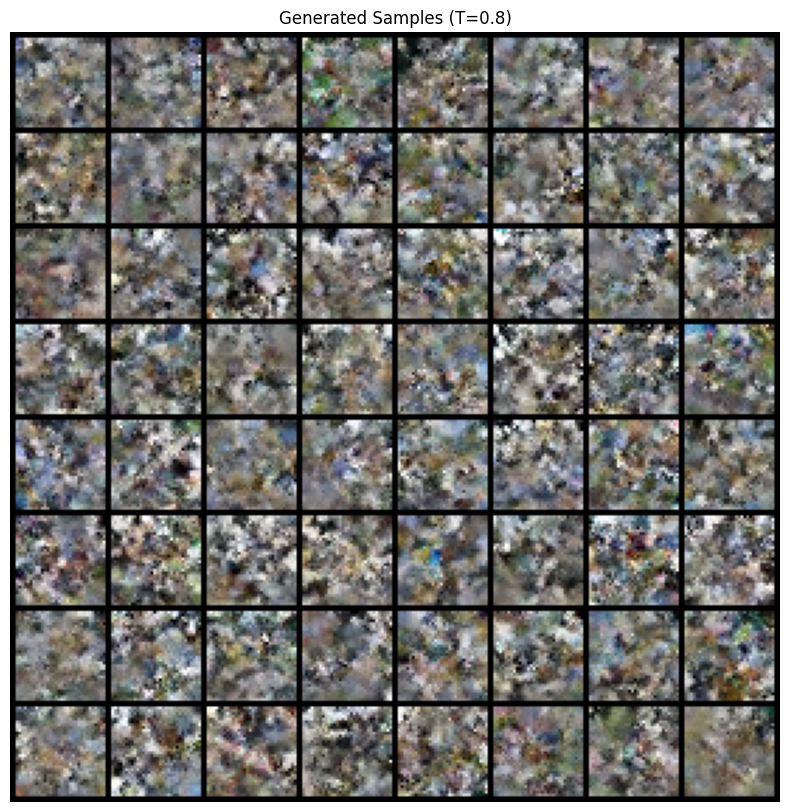

Logged final samples to WandB.


In [15]:
# Load best model (automatically saved during training)
from src.vae.model import NVAE
import torchvision.utils as vutils

model = NVAE(
    hidden_dim=config['hidden_dim'],
    latent_dim=config['latent_dim'],
    num_scales=config['num_scales']
).to(device)

model.load_state_dict(torch.load(os.path.join(config['model_save_dir'], 'nvae_best.pth')))
print("Loaded best model.")

# Generate
samples = generate_samples(model, num_samples=64, temperature=0.8, device=device)

# Visualize locally
plt.figure(figsize=(10, 10))
grid_img = vutils.make_grid(samples, nrow=8, normalize=True)
plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
plt.axis('off')
plt.title("Generated Samples (T=0.8)")
plt.show()

# Log to WandB if active
if wandb.run is not None:
    wandb.log({
        "final_evaluation/generated_samples_grid": [wandb.Image(grid_img, caption="Final Generated Samples (T=0.8)")]
    })
    print("Logged final samples to WandB.")